# pagmo interface

In this tutorial we show how to use *dsyre* to solve a symbolic regression problem using the pagmo interface, that is
by considering the problem as an optimization problem, a UDP (User Defined Problem), and apply a suitable optimization algorithm to it, 
that is a UDA (User Defined Algorithm). 

This interface comes in handy when we look at symbolic regression from an operation research point of view as an optimization problem.

Lets start with some imports:

In [1]:
import pydsyre as dsy
import numpy as np
import pygmo as pg

from matplotlib import pyplot as plt

%matplotlib inline

we will make use of the problem P1 from the paper:

Izzo, Dario, Francesco Biscani, and Alessio Mereta. "Differentiable genetic programming." 
European Conference on Genetic Programming. Springer, 2017.

The functional form of such a problem is:

$$
     y = x^5 - \pi x^3 + x
$$

where *x* is sampled in ten equally spaced points in [1,3]. We make use of the readily available *gym* module in *dsyre*, even if in this case it would be only a few lines of code to actually explicitly compute the dataset.

In [2]:
# We import the problem:
xs, ys = dsy.gym.generate_P1()
xs = np.array(xs)
ys = np.array(ys)

# Equivalently, in this case, we could just write:
xs = np.linspace(1,3, 10)
ys = xs**5 - np.pi * xs**3 + xs
xs = xs.reshape(-1,1)

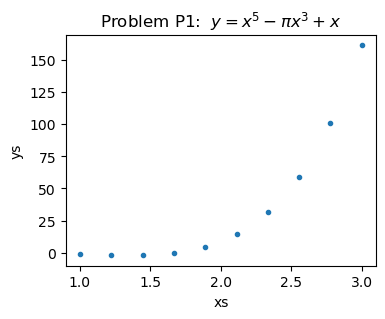

In [3]:
# We show the data
plt.figure(figsize=(4,3))
plt.plot(xs,ys, '.')
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Problem P1:  $y = x^5 - \pi x^3 + x$");

We are now ready to define some hyperparameters for our learning setup:

In [4]:
length = 20 # The number of triplets used
max_mut = 15 # The maximum number of mutations
ncons = 1 # The number of constants in the formula
popsize = 4 # The population size
gen = 1000 # Maximum number of generations

Then we instantiate the UDP and UDA 

In [5]:
## Instantiate the UDP
udp = dsy.sr_problem(xs = xs, 
                     ys = ys, 
                     length = length,
                     kernels = ["sum", "mul", "diff", "div"],
                     ncons = ncons, 
                     multi_objective = False);
                     
## Instantiate the UDA
uda = dsy.mes4dsyre(gen = gen, max_mut = max_mut, ftol = 1e-10)

## Pagmo problem
prob = pg.problem(udp)
## Pagmo algorithm
algo = pg.algorithm(uda)
algo.set_verbosity(1)

and solve ...

In [6]:
## Pagmo population
pop = pg.population(prob, popsize)
## Evolution!
pop = algo.evolve(pop)

I am here!
Gen:    Fevals: Best:       Constants and Formula:                             
0       0       2.28187e+03 [-3.76599e+00] (2*c0 - x0)*x0*c0 
1       4       9.48839e+02 [1.09722e+01] x0**2*c0 
2       8       9.48839e+02 [-2.21907e+01] (x0 + x0*c0)/(c0 + x0) - (x0 + x0*c0) 
3       12      9.48839e+02 [-2.30985e+01] (x0 + x0*c0)/(c0 + x0) - (x0 + x0*c0) 
4       16      9.48839e+02 [9.97219e+00] x0*(x0 + x0*c0) 
5       20      9.24287e+02 [-1.23728e+01] x0**2*(-(c0 + x0**3) + x0**3) - (x0 + x0 ...
6       24      8.61803e+02 [-1.23728e+01] x0**4 
7       28      6.75155e+02 [-1.23728e+01] x0**2 + x0**4 
8       32      1.32037e+01 [1.96430e-01] x0**3/c0 
9       36      1.32037e+01 [3.48466e+00] x0**2*(x0 + x0**2) 
10      40      1.32037e+01 [3.23727e+00] (x0 + x0**2)**2 
11      44      1.32037e+01 [3.23727e+00] (x0 + x0**2)**2 
12      48      1.32037e+01 [3.23727e+00] (x0 + x0**2)**2 
13      52      1.32037e+01 [3.23727e+00] (x0 + x0**2)**2 
14      56      1.32037e+0

We can now show the final evolved formula as decoded directly from the chromosome:

In [7]:
udp.pretty(pop.champion_x)

'((((x0*x0)/x0)*((x0*x0)*((x0*x0)-c0)))+((x0*x0)/x0))'

... and the same formula as simplified by removing excessive parenthesis and repetitions:

In [8]:
udp.prettier(pop.champion_x)

'x0 + x0**3*(-c0 + x0**2)'

Let us now use our newly found model to predict points! In this case we have a zero loss, hence our model coincides with the data ....


Text(0, 0.5, 'ys')

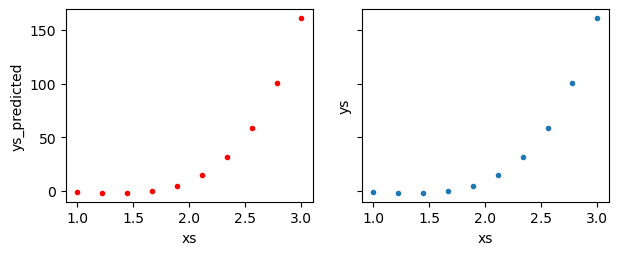

In [20]:
# We predict
ys_predicted = udp.predict(pop.champion_x, xs)
fig, ax = plt.subplots(1,2,figsize=(7,2.5), sharey=True)
ax[0].plot(xs,ys_predicted, 'r.')
ax[1].plot(xs,ys, '.')

ax[0].set_xlabel("xs")
ax[1].set_xlabel("xs")

ax[0].set_ylabel("ys_predicted")
ax[1].set_ylabel("ys")

